In [2]:
!pip install pandas

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |################################| 10.1MB 2.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import numpy 

import matplotlib.pyplot

import cartopy.crs

import pandas

In [4]:
#1: data with both finished paleo-depths and NSB imported depth-age model
data1=pandas.read_csv('fullsets.csv')

#2: data with finished paleo-depths but not on NSB database
data2=pandas.read_csv('no_NSB_model.csv')

In [5]:
#Print(data1)

#Print(data2)

In [6]:
long1=data1['Longitude']
lat1=data1['Latitude']

long2=data2['Longitude']
lat2=data2['Latitude']

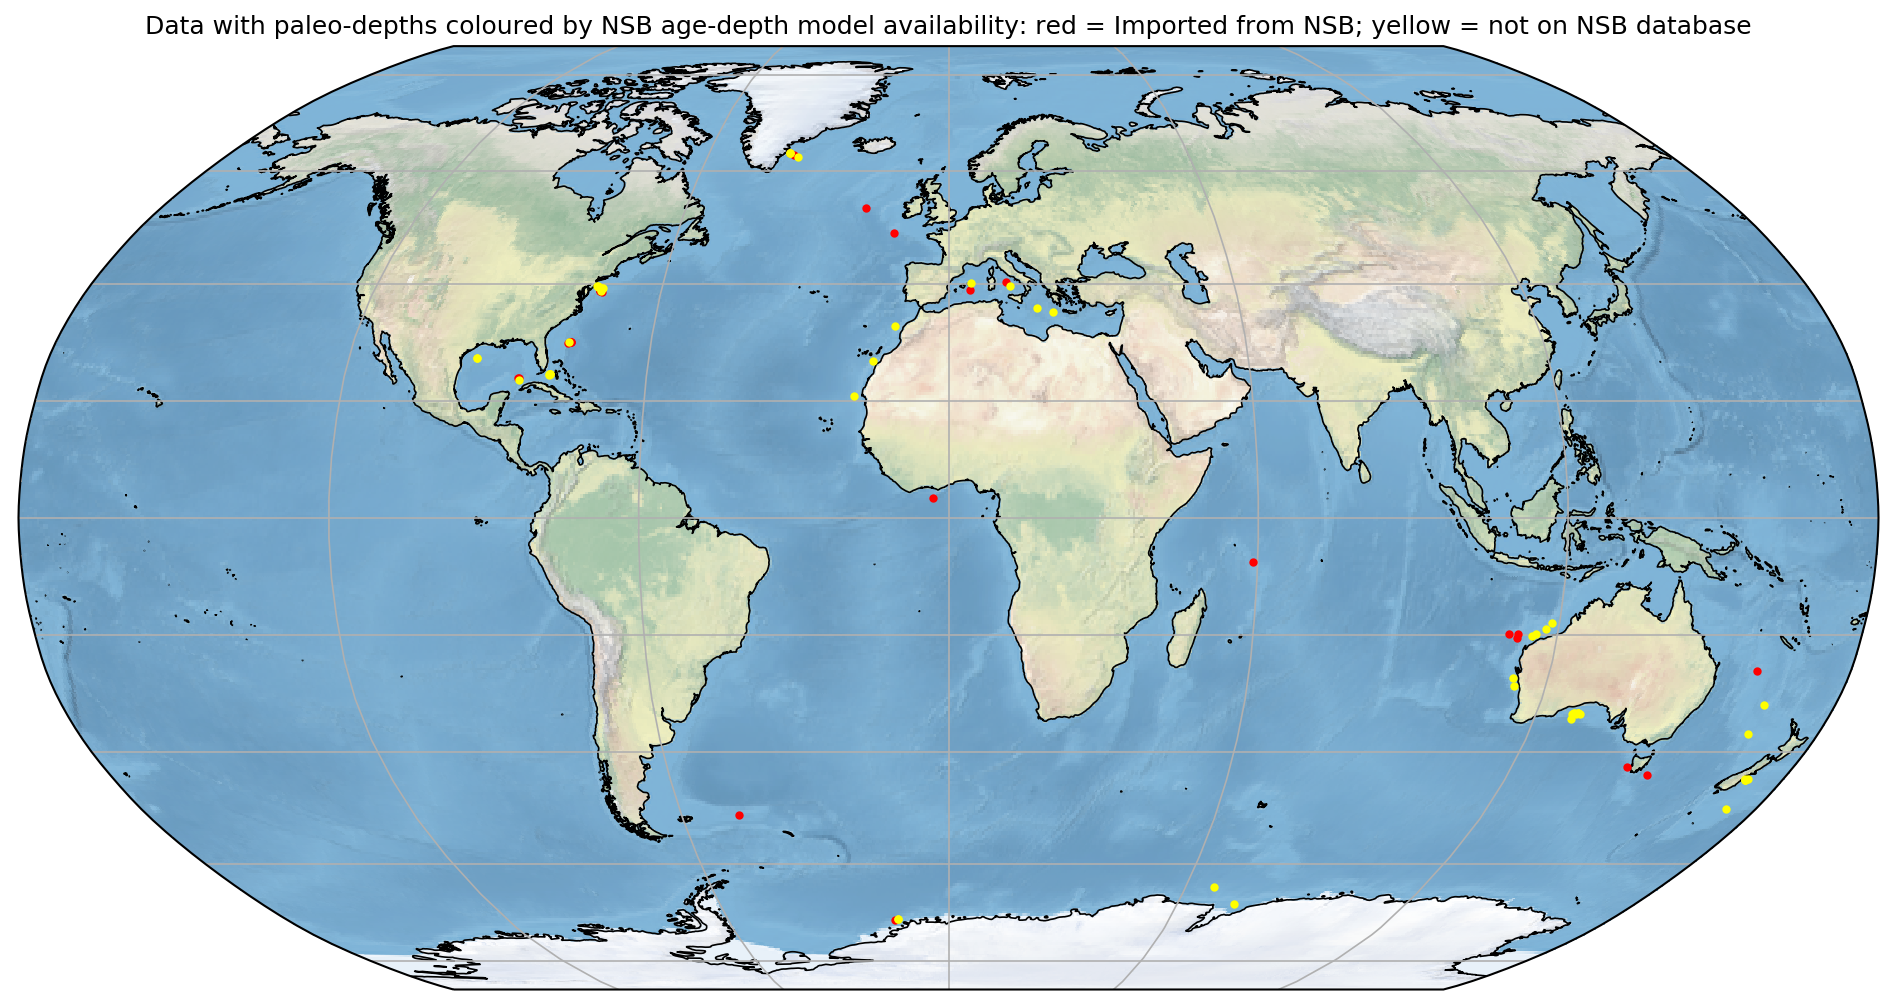

In [43]:
#coloured by age-depth model availablilty on NSB
fig = matplotlib.pyplot.figure(figsize=(16,12),dpi=150)

ax = matplotlib.pyplot.axes(projection=cartopy.crs.Robinson())
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()#draw_labels=True for gridline labels on supported projections above

#data into map
mapscat=ax.scatter(long1,lat1,marker=".",color='red',transform=cartopy.crs.Geodetic(),zorder=4)
mapscat=ax.scatter(long2,lat2,marker=".",color='yellow',transform=cartopy.crs.Geodetic(),zorder=4)

matplotlib.pyplot.title('Data with paleo-depths coloured by NSB age-depth model availability: red = Imported from NSB; yellow = not on NSB database')
matplotlib.pyplot.show()

In [26]:
#site names for labels
a=data1['Well Name']
b=data2['Well Name']

<Figure size 2400x1800 with 0 Axes>

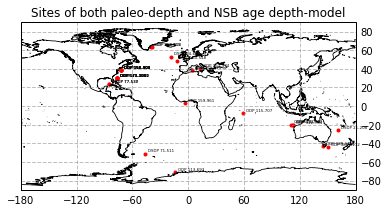

In [41]:
#paleodepth and agedepth with labels - cant get it to work above
fig = matplotlib.pyplot.figure(figsize=(16,12),dpi=150)

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(1, 1, 1,projection=cartopy.crs.PlateCarree())

ax.set_global()
ax.coastlines('50m', linewidth=0.8)
#ax.stock_img()#to add map colour image

mapscat = ax.scatter(long1,lat1,color='r',marker='.')
matplotlib.pyplot.title('Sites of both paleo-depth and NSB age depth-model')

#grid lines and labels
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER


#well labels
for i, txt in enumerate(a):
    ax.annotate(txt, (long1[i], lat1[i]), size=4, xytext=(3,2), ha='left', textcoords='offset points')


<Figure size 2400x1800 with 0 Axes>

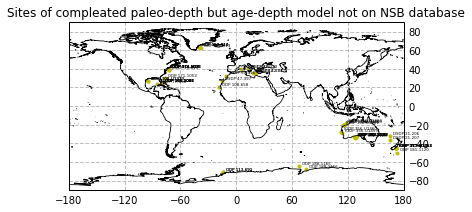

In [40]:
#no NSB agedepth
fig = matplotlib.pyplot.figure(figsize=(16,12),dpi=150)

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(1, 1, 1,projection=cartopy.crs.PlateCarree())

ax.set_global()
ax.coastlines('50m', linewidth=0.8)
#ax.stock_img()#to add map colour image

mapscat = ax.scatter(long2,lat2,color='y',marker='.')
matplotlib.pyplot.title('Sites of compleated paleo-depth but age-depth model not on NSB database')

#grid lines and labels
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER


#well labels
for i, txt in enumerate(b):
    ax.annotate(txt, (long2[i], lat2[i]), size=4, xytext=(3,2), ha='left', textcoords='offset points')